# Importing libs

In [291]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [292]:
for dirname, _, filenames in os.walk('salaryClean.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [293]:
pd.set_option('display.max_columns', 100)

In [294]:
salary = pd.read_csv("Salary.csv")

In [295]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,36,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
3,42,Female,2,Product Manager,12.0,120000.0,USA,Asian,0
4,33,Female,2,Marketing Manager,7.0,90000.0,USA,Asian,0


# PreProcessing

In [296]:
salary['Job Title'].value_counts()

Job Title
Software Engineer            590
Data Scientist               372
Software Engineer Manager    313
Full Stack Engineer          259
Project Engineer             256
Data Analyst                 253
Marketing Manager            247
Product Manager              203
Back end Developer           201
Front end Developer          192
Sales Associate              168
Name: count, dtype: int64

In [297]:
salary['Race'].value_counts()

Race
White               908
Asian               752
Australian          210
Korean              206
Black               185
Chinese             176
African American    163
Mixed               158
Hispanic            155
Welsh               141
Name: count, dtype: int64

In [298]:
salary['Country'].value_counts()

Country
USA          650
UK           624
Australia    609
Canada       593
China        578
Name: count, dtype: int64

In [299]:
salary['Education Level'].value_counts()

Education Level
1    1178
2     987
3     706
0     183
Name: count, dtype: int64

In [300]:
salary['Age'].describe()

count    3054.000000
mean       34.568435
std         8.387738
min        22.000000
25%        28.000000
50%        32.000000
75%        41.000000
max        62.000000
Name: Age, dtype: float64

In [301]:
# Dicts

s = salary

s = s[s["Race"] != "Welsh"]
s = s[s["Race"] != "Hispanic"]


Gender = {"Male":0,"Female":1}

job_title = {"Software Engineer":0,"Data Scientist":1,"Software Engineer Manager":2,"Full Stack Engineer":3,"Project Engineer":4,"Data Analyst":5,"Marketing Manager":6,"Product Manager":7,"Back end Developer":8,"Front end Developer":9,"Sales Associate":10,}

Race = {"White":0,"Asian":1,"Australian":2,"Korean":3,"Black":4,"Chinese":5,"African American":6,"Mixed":7}

Country = {"USA":0,"UK":1,"Australia":2,"Canada":3,"China":4,}

s["Gender"] = s["Gender"].map(Gender).fillna(s["Gender"])

s["Job Title"] = s["Job Title"].map(job_title).fillna(s["Job Title"])

s["Race"] = s["Race"].map(Race).fillna(s["Race"])

s["Country"] = s["Country"].map(Country).fillna(s["Country"])

""" z = s["Age"].value_counts()
s = s[s.isin(z.index[z >= 25 ]).values]
s = s[s.isin(z.index[z <= 50 ]).values] """


new_path = "last_salary.csv"
s.to_csv(new_path,index=False)


In [302]:
s = s.drop(columns = ['Race'])

In [303]:
s.to_csv('final_salary',index=False)

In [304]:
salary = s

In [305]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Senior
0,32,0,1,0,5.0,90000.0,1,0
3,42,1,2,7,12.0,120000.0,0,0
4,33,1,2,6,7.0,90000.0,0,0
6,42,0,2,4,14.0,115000.0,4,0
7,35,0,2,7,7.0,105000.0,3,0


In [306]:
X = salary.drop(['Salary'], axis=1)
y = salary['Salary']

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [308]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2206, 7)
(552, 7)
(2206,)
(552,)


In [309]:
cols = X_train.columns

# - Preprocessing Plots

In [310]:
useless_df = pd.read_csv("Salary.csv")

In [311]:
import plotly.express as px

# Assuming you have a DataFrame named df
fig = px.histogram(useless_df, x='Age', width=800, height=600, color_discrete_sequence=['skyblue'])
fig.update_layout(title="Age Distribution")
fig.show()

In [312]:
fig3 = px.histogram(useless_df, x='Salary', width=800, height=600, color_discrete_sequence=['skyblue'])
fig3.update_layout(title="Salary Distribution")
fig3.show()

In [313]:
fig = px.scatter(useless_df, x='Age', y='Salary', color='Gender',
             title='Age vs. Salary for Software Engineers Filtered by Gender')
fig.show()

In [314]:
fig = px.scatter(useless_df, x="Years of Experience", y="Salary", color = 'Age',
                 title='Years of Experience vs. Salary for Software Engineers')
fig.show()

<Axes: >

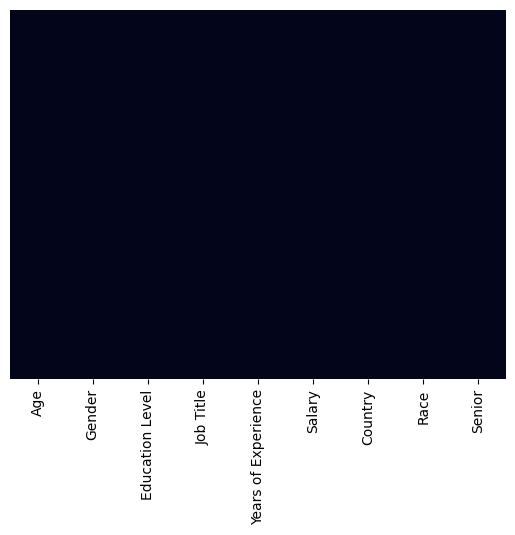

In [315]:
sns.heatmap(useless_df.isnull(),yticklabels=False,cbar=False)

# - Standerd Scaler

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [317]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [318]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [319]:
X_train.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Senior
count,2.206000e+03,2.206000e+03,2.206000e+03,2.206000e+03,2.206000e+03,2.206000e+03,2.206000e+03
mean,-1.095125e-16,1.030706e-16,-1.449430e-17,1.159544e-16,4.026194e-18,9.984961e-17,3.220955e-18
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.494548e+00,-8.262475e-01,-1.937064e+00,-1.227080e+00,-1.183467e+00,-1.547571e+00,-4.634196e-01
25%,-7.759403e-01,-8.262475e-01,-8.008865e-01,-9.144286e-01,-7.358497e-01,-8.222805e-01,-4.634196e-01
50%,-2.968683e-01,-8.262475e-01,3.352907e-01,2.352684e-02,-1.390265e-01,-9.699030e-02,-4.634196e-01
75%,7.810438e-01,1.210291e+00,3.352907e-01,6.488305e-01,6.070024e-01,6.282999e-01,-4.634196e-01
max,3.296172e+00,1.210291e+00,1.471468e+00,1.899438e+00,3.740324e+00,1.353590e+00,2.157872e+00


# - SVR With defualt paramerter

In [320]:
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

svc = SVR(C=100)

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

In [321]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r_squared:.4f}")


Mean Squared Error (MSE): 1722190897.9388
Mean Absolute Error (MAE): 34370.4980
R-squared (Coefficient of Determination): 0.3313


In [322]:
linear_svr = SVR(kernel='linear', C=100.0,gamma=0.01)

linear_svr.fit(X_train, y_train)

y_pred = linear_svr.predict(X_test)


In [323]:
y_pred_train = linear_svr.predict(X_train)

In [324]:
y_pred_test = linear_svr.predict(X_test)

In [325]:
print(linear_svr.score(X_test, y_test))

0.6652770524565654


# - SVR With Poly Kernel

In [326]:
poly_svr = SVR(kernel='poly', C=250000.0,gamma=0.1)

poly_svr.fit(X_train, y_train)

y_pred = poly_svr.predict(X_test)

In [327]:
print(poly_svr.score(X_test,y_test))

0.7533956904543017


In [328]:
sigmoid_svr = SVR(kernel='sigmoid', C=420,gamma=0.1)

sigmoid_svr.fit(X_train,y_train)

y_pred = sigmoid_svr.predict(X_test)

In [329]:
print(sigmoid_svr.score(X_test,y_test))

0.6494171237383519


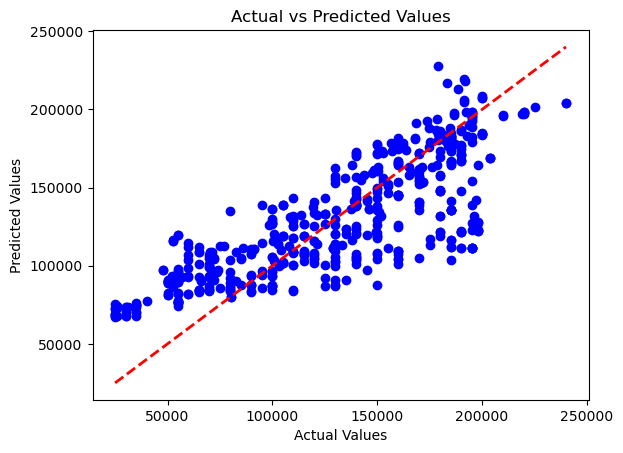

In [330]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# - Extract Model

In [337]:
import joblib
joblib.dump(poly_svr, "SVM.pkl")

['SVM.pkl']

In [338]:
import joblib
joblib.dump(scaler, "SVM_Scale.pkl")

['SVM_Scale.pkl']